In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [2]:
purchase = pd.read_csv(
    'C:/Users/purchase_raw_data.csv',
    parse_dates=['first_purchase_date','order_submit_date'])

In [3]:
customer = pd.read_csv(
    'C:/Users/customer_raw_data.csv',
    parse_dates=['first_purchase_month'])

In [4]:
purchase.head()

,shopper_id,first_purchase_date,order_submit_date,order_total
0,1619,2014-05-10,2014-05-10,107.0
1,1619,2014-05-10,2014-05-21,34.0
2,1619,2014-05-10,2014-09-04,137.6
3,1619,2014-05-10,2014-09-24,162.0
4,1619,2014-05-10,2014-11-08,281.0


In [5]:
customer.head(38)

,first_purchase_month,num_customers
0,201403,4
1,201404,79
2,201405,132
3,201406,195
4,201407,205
5,201408,256
6,201409,232
7,201410,146
8,201411,244
9,201412,358


## Task 1

calculate the LTV(life time value) of a customer cohort

In [6]:
cch=purchase.loc[(purchase['first_purchase_date'] == '2014-5')].reset_index()
cch

,index,shopper_id,first_purchase_date,order_submit_date,order_total
0,406,1696,2014-05-01,2014-05-01,160.95
1,407,1696,2014-05-01,2014-05-03,141.00
2,408,1696,2014-05-01,2014-06-21,367.00
3,409,1696,2014-05-01,2014-07-16,65.70
4,410,1696,2014-05-01,2014-12-04,339.98
5,411,1696,2014-05-01,2015-08-28,276.00
6,412,1696,2014-05-01,2016-04-28,276.00
7,1065,1837,2014-05-01,2014-05-01,329.85
8,1066,1837,2014-05-01,2014-07-05,58.00
9,1067,1837,2014-05-01,2014-10-19,53.00


In [7]:
mask = (purchase['first_purchase_date'].dt.to_period('M') == pd.to_datetime('2014-5').to_period('M'))
cg = purchase.loc[mask]

In [8]:
cg

,shopper_id,first_purchase_date,order_submit_date,order_total
0,1619,2014-05-10,2014-05-10,107.00
1,1619,2014-05-10,2014-05-21,34.00
2,1619,2014-05-10,2014-09-04,137.60
3,1619,2014-05-10,2014-09-24,162.00
4,1619,2014-05-10,2014-11-08,281.00
...,...,...,...,...
14436,97610,2014-05-31,2014-12-17,34.00
14437,97610,2014-05-31,2015-02-24,88.00
14438,97610,2014-05-31,2015-07-04,39.99
14439,97610,2014-05-31,2016-09-16,24.00


In [9]:
cpurch = cg['shopper_id'].value_counts()
cpurch.mean()

5.378787878787879

In [10]:
cid = cg.groupby(['shopper_id'])[['order_total']].sum()
cid.head(20)

,order_total
shopper_id,
1619,2274.03
1621,1529.95
1622,373.98
1640,584.50
1643,658.99
1646,246.49
1648,1784.90
1656,3303.98
1665,4787.39


In [11]:
cid.sum()

order_total    70923.2
dtype: float64

In [12]:
cdate = cg.groupby(['shopper_id'])['order_submit_date'].agg(['first','last'])
cdate.head(20)

,first,last
shopper_id,,
1619,2014-05-10,2016-11-28
1621,2014-05-23,2017-01-03
1622,2014-05-19,2016-03-11
1640,2014-05-13,2016-04-26
1643,2014-05-07,2016-11-25
1646,2014-05-07,2016-03-20
1648,2014-05-15,2017-01-21
1656,2014-05-09,2015-11-17
1665,2014-05-23,2016-09-29


In [13]:
cdate.columns

Index(['first', 'last'], dtype='object')

In [14]:
cdate['lifespan']=cdate['last'].dt.to_period('M').astype(int) - cdate['first'].dt.to_period('M').astype(int)
cdate.head()

,first,last,lifespan
shopper_id,,,
1619,2014-05-10,2016-11-28,30
1621,2014-05-23,2017-01-03,32
1622,2014-05-19,2016-03-11,22
1640,2014-05-13,2016-04-26,23
1643,2014-05-07,2016-11-25,30


In [15]:
cdate.mean()

lifespan    10.318182
dtype: float64

In [16]:
cv = cid.sum() * cpurch.mean()
clp = cdate['lifespan'].mean()
cltv = (cv) * (clp)
cltv

order_total    3.936189e+06
dtype: float64

In [17]:
cv.round()

order_total    381481.0
dtype: float64

In [18]:
clp

10.318181818181818

## From the dateset provided, the customer life time value for the customer cohort '2014-05' is = 3,936,189

## Task 2

Determine the retention rate of a customer cohort over time.

In [19]:
r=(cg['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2014').to_period('Y'))
S=cg.loc[r]
S

,shopper_id,first_purchase_date,order_submit_date,order_total
0,1619,2014-05-10,2014-05-10,107.00
1,1619,2014-05-10,2014-05-21,34.00
2,1619,2014-05-10,2014-09-04,137.60
3,1619,2014-05-10,2014-09-24,162.00
4,1619,2014-05-10,2014-11-08,281.00
...,...,...,...,...
14390,97592,2014-05-31,2014-05-31,34.00
14433,97610,2014-05-31,2014-05-31,48.00
14434,97610,2014-05-31,2014-06-14,37.95
14435,97610,2014-05-31,2014-12-15,24.00


In [20]:
S['shopper_id'].value_counts().shape[0]

132

In [21]:
r15=(cg['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2015').to_period('Y'))
E15=cg.loc[r15]
E15['shopper_id'].value_counts().shape[0]

56

In [22]:
r16=(cg['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2016').to_period('Y'))
E16=cg.loc[r16]
E16['shopper_id'].value_counts().shape[0]

32

In [23]:
r17=(cg['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2017').to_period('Y'))
E17=cg.loc[r17]
E17['shopper_id'].value_counts().shape[0]

9

In [24]:
crr15 = E15['shopper_id'].value_counts().shape[0] / S['shopper_id'].value_counts().shape[0] *100
crr15

42.42424242424242

In [25]:
crr16 = E16['shopper_id'].value_counts().shape[0] / S['shopper_id'].value_counts().shape[0] *100
crr16

24.242424242424242

In [26]:
crr17 = E17['shopper_id'].value_counts().shape[0] / S['shopper_id'].value_counts().shape[0] *100
crr17

6.8181818181818175

## From the dataset, the retention rate for the customer cohort (2014-05) overtime is = 42.4% in 2015, 24.2% in 2016 and 6.8% in 2017 respectively.

## Task 3

Calculate the frequency of purchase over time for a given customer cohort.

In [27]:
fq14=(cg['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2014').to_period('Y'))
norders14=cg.loc[fq14]
norders14

,shopper_id,first_purchase_date,order_submit_date,order_total
0,1619,2014-05-10,2014-05-10,107.00
1,1619,2014-05-10,2014-05-21,34.00
2,1619,2014-05-10,2014-09-04,137.60
3,1619,2014-05-10,2014-09-24,162.00
4,1619,2014-05-10,2014-11-08,281.00
...,...,...,...,...
14390,97592,2014-05-31,2014-05-31,34.00
14433,97610,2014-05-31,2014-05-31,48.00
14434,97610,2014-05-31,2014-06-14,37.95
14435,97610,2014-05-31,2014-12-15,24.00


In [28]:
norders14['shopper_id'].value_counts().shape[0]

132

In [29]:
norders14.shape[0]

341

In [30]:
fqp14 = norders14.shape[0] / norders14['shopper_id'].value_counts().shape[0]
fqp14

2.5833333333333335

In [31]:
fq15=(cg['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2015').to_period('Y'))
norders15=cg.loc[fq15]
norders15

,shopper_id,first_purchase_date,order_submit_date,order_total
6,1619,2014-05-10,2015-03-15,293.00
7,1619,2014-05-10,2015-05-16,142.94
20,1621,2014-05-23,2015-10-17,22.00
21,1621,2014-05-23,2015-11-28,66.50
22,1621,2014-05-23,2015-12-02,107.00
...,...,...,...,...
14054,96887,2014-05-30,2015-02-01,54.92
14194,97452,2014-05-30,2015-02-22,90.00
14241,97499,2014-05-31,2015-08-01,84.00
14437,97610,2014-05-31,2015-02-24,88.00


In [32]:
fqp15 = norders15.shape[0] / norders15['shopper_id'].value_counts().shape[0]
fqp15

3.8392857142857144

In [33]:
norders15['shopper_id'].value_counts().shape[0]

56

In [34]:
fq16=(cg['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2016').to_period('Y'))
norders16=cg.loc[fq16]
norders16

,shopper_id,first_purchase_date,order_submit_date,order_total
8,1619,2014-05-10,2016-07-16,433.99
9,1619,2014-05-10,2016-11-28,352.00
23,1621,2014-05-23,2016-01-01,132.00
24,1621,2014-05-23,2016-02-13,108.00
25,1621,2014-05-23,2016-04-08,127.00
...,...,...,...,...
13751,96221,2014-05-09,2016-12-01,18.00
13822,96276,2014-05-04,2016-08-15,68.00
13855,96317,2014-05-15,2016-06-30,60.00
14055,96887,2014-05-30,2016-10-08,36.00


In [35]:
fqp16 = norders16.shape[0] / norders16['shopper_id'].value_counts().shape[0]
fqp16

4.46875

In [36]:
norders16['shopper_id'].value_counts().shape[0]

32

In [37]:
fq17=(cg['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2017').to_period('Y'))
norders17=cg.loc[fq17]
norders17

,shopper_id,first_purchase_date,order_submit_date,order_total
30,1621,2014-05-23,2017-01-03,68.0
150,1648,2014-05-15,2017-01-01,34.5
151,1648,2014-05-15,2017-01-21,17.5
657,1731,2014-05-13,2017-01-06,138.0
658,1731,2014-05-13,2017-02-03,48.0
1030,1798,2014-05-19,2017-02-02,129.0
1110,1867,2014-05-19,2017-01-19,82.5
1275,1964,2014-05-30,2017-01-09,61.0
1383,1973,2014-05-31,2017-01-03,602.0
13172,95902,2014-05-14,2017-01-09,49.0


In [38]:
fqp17 = norders17.shape[0] / norders17['shopper_id'].value_counts().shape[0]
fqp17

1.2222222222222223

In [39]:
norders17['shopper_id'].value_counts().shape[0]

9

In [40]:
norders17.shape[0]

11

## The frequency of purchase for a given customer cohort (2014-05) are 2.58 in 2014, 3.83 in 2015, 4.46 in 2016 and 1.22 in 2017 respectively.

## Task 4

Calculate the rate of churn for a customer cohort.

In [41]:
totalc14=(cg['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2014').to_period('Y'))
nocust14=cg.loc[totalc14]
nocust14

,shopper_id,first_purchase_date,order_submit_date,order_total
0,1619,2014-05-10,2014-05-10,107.00
1,1619,2014-05-10,2014-05-21,34.00
2,1619,2014-05-10,2014-09-04,137.60
3,1619,2014-05-10,2014-09-24,162.00
4,1619,2014-05-10,2014-11-08,281.00
...,...,...,...,...
14390,97592,2014-05-31,2014-05-31,34.00
14433,97610,2014-05-31,2014-05-31,48.00
14434,97610,2014-05-31,2014-06-14,37.95
14435,97610,2014-05-31,2014-12-15,24.00


In [42]:
T = nocust14['shopper_id'].value_counts().shape[0]
T

132

In [43]:
totalc15=(cg['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2015').to_period('Y'))
nocust15=cg.loc[totalc15]
nocust15

,shopper_id,first_purchase_date,order_submit_date,order_total
6,1619,2014-05-10,2015-03-15,293.00
7,1619,2014-05-10,2015-05-16,142.94
20,1621,2014-05-23,2015-10-17,22.00
21,1621,2014-05-23,2015-11-28,66.50
22,1621,2014-05-23,2015-12-02,107.00
...,...,...,...,...
14054,96887,2014-05-30,2015-02-01,54.92
14194,97452,2014-05-30,2015-02-22,90.00
14241,97499,2014-05-31,2015-08-01,84.00
14437,97610,2014-05-31,2015-02-24,88.00


In [44]:
nocust15['shopper_id'].value_counts().shape[0]

56

In [45]:
lostc15 = nocust14['shopper_id'].value_counts().shape[0] - nocust15['shopper_id'].value_counts().shape[0]
lostc15

76

In [46]:
CR15 = lostc15 / T * 100
CR15

57.57575757575758

In [47]:
totalc16=(cg['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2016').to_period('Y'))
nocust16=cg.loc[totalc16]
nocust16

,shopper_id,first_purchase_date,order_submit_date,order_total
8,1619,2014-05-10,2016-07-16,433.99
9,1619,2014-05-10,2016-11-28,352.00
23,1621,2014-05-23,2016-01-01,132.00
24,1621,2014-05-23,2016-02-13,108.00
25,1621,2014-05-23,2016-04-08,127.00
...,...,...,...,...
13751,96221,2014-05-09,2016-12-01,18.00
13822,96276,2014-05-04,2016-08-15,68.00
13855,96317,2014-05-15,2016-06-30,60.00
14055,96887,2014-05-30,2016-10-08,36.00


In [48]:
lostc16 = nocust14['shopper_id'].value_counts().shape[0] - nocust16['shopper_id'].value_counts().shape[0]
lostc16

100

In [49]:
CR16 = lostc16 / T * 100
CR16

75.75757575757575

In [50]:
totalc17=(cg['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2017').to_period('Y'))
nocust17=cg.loc[totalc17]
nocust17

,shopper_id,first_purchase_date,order_submit_date,order_total
30,1621,2014-05-23,2017-01-03,68.0
150,1648,2014-05-15,2017-01-01,34.5
151,1648,2014-05-15,2017-01-21,17.5
657,1731,2014-05-13,2017-01-06,138.0
658,1731,2014-05-13,2017-02-03,48.0
1030,1798,2014-05-19,2017-02-02,129.0
1110,1867,2014-05-19,2017-01-19,82.5
1275,1964,2014-05-30,2017-01-09,61.0
1383,1973,2014-05-31,2017-01-03,602.0
13172,95902,2014-05-14,2017-01-09,49.0


In [51]:
lostc17 = nocust14['shopper_id'].value_counts().shape[0] - nocust17['shopper_id'].value_counts().shape[0]
lostc17

123

In [52]:
CR17 = lostc17 / T * 100
CR17

93.18181818181817

## From the dataset provided, the rate of churn (attrition rate) for the customer cohort (2014-05) are 57.6% in 2015, 75.6% in 2016 and 93.2% in 2017 respectively.

## Task 5

Qualitatively, are the customers getting better over time? I.e are the customers who first made a purchase in 2015 better than those who first made purchase in 2014 and so on? Why or why not? 

In [53]:
Cust14=(purchase['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2014').to_period('Y'))
CQ14=purchase.loc[Cust14]
CQ14

,shopper_id,first_purchase_date,order_submit_date,order_total
0,1619,2014-05-10,2014-05-10,107.0
1,1619,2014-05-10,2014-05-21,34.0
2,1619,2014-05-10,2014-09-04,137.6
3,1619,2014-05-10,2014-09-24,162.0
4,1619,2014-05-10,2014-11-08,281.0
...,...,...,...,...
17822,106174,2014-12-29,2014-12-29,108.0
17823,106178,2014-12-29,2014-12-29,103.0
17825,106180,2014-12-29,2014-12-29,95.0
17828,106184,2014-12-29,2014-12-29,29.0


In [54]:
CQ14['order_total'].mean()

81.24299652668161

In [55]:
CQ14['shopper_id'].value_counts().sum()

3167

In [56]:
CV2014 = CQ14['order_total'].mean() * CQ14['shopper_id'].value_counts().mean()
CV2014

139.15444564629564

In [57]:
Cust15=(purchase['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2015').to_period('Y'))
CQ15=purchase.loc[Cust15]
CQ15

,shopper_id,first_purchase_date,order_submit_date,order_total
6,1619,2014-05-10,2015-03-15,293.00
7,1619,2014-05-10,2015-05-16,142.94
20,1621,2014-05-23,2015-10-17,22.00
21,1621,2014-05-23,2015-11-28,66.50
22,1621,2014-05-23,2015-12-02,107.00
...,...,...,...,...
19862,109781,2015-10-20,2015-10-20,118.00
19863,115513,2015-12-08,2015-12-08,12.00
19864,115630,2015-12-12,2015-12-12,125.00
19865,115753,2015-12-15,2015-12-15,99.00


In [58]:
CQ15['order_total'].mean()

107.60446441408918

In [59]:
CQ15['shopper_id'].value_counts().sum()

8346

In [60]:
CV2015 = CQ15['order_total'].mean() * CQ15['shopper_id'].value_counts().mean()
CV2015

240.96239871209775

In [61]:
Cust16=(purchase['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2016').to_period('Y'))
CQ16=purchase.loc[Cust16]
CQ16

,shopper_id,first_purchase_date,order_submit_date,order_total
8,1619,2014-05-10,2016-07-16,433.99
9,1619,2014-05-10,2016-11-28,352.00
12,1620,2014-06-01,2016-01-07,130.00
13,1620,2014-06-01,2016-08-15,66.50
23,1621,2014-05-23,2016-01-01,132.00
...,...,...,...,...
23832,151035,2016-12-31,2016-12-31,91.00
23834,151056,2016-12-31,2016-12-31,89.97
23835,151060,2016-12-31,2016-12-31,59.98
23836,151062,2016-12-31,2016-12-31,36.00


In [62]:
CQ16['order_total'].mean()

119.17794862834079

In [63]:
CQ16['shopper_id'].value_counts().sum()

11446

In [64]:
CV2016 = CQ16['order_total'].mean() * CQ16['shopper_id'].value_counts().mean()
CV2016

256.4600112803137

In [65]:
Cust17=(purchase['order_submit_date'].dt.to_period('Y') == pd.to_datetime('2017').to_period('Y'))
CQ17=purchase.loc[Cust17]
CQ17

,shopper_id,first_purchase_date,order_submit_date,order_total
30,1621,2014-05-23,2017-01-03,68.00
85,1642,2014-07-10,2017-01-10,328.50
96,1644,2017-01-07,2017-01-07,58.00
150,1648,2014-05-15,2017-01-01,34.50
151,1648,2014-05-15,2017-01-21,17.50
...,...,...,...,...
24324,157488,2017-02-03,2017-02-03,30.00
24325,157516,2017-02-03,2017-02-03,90.00
24326,157531,2017-02-03,2017-02-03,10.00
24327,157549,2017-02-03,2017-02-03,53.75


In [66]:
CQ17['order_total'].mean()

114.2644233576643

In [67]:
CQ17['shopper_id'].value_counts().sum()

1370

In [68]:
CV2017 = CQ17['order_total'].mean() * CQ17['shopper_id'].value_counts().mean()
CV2017

166.35734325185982

In [69]:
Q = [CQ14['order_total'].sum(),CQ15['order_total'].sum(),CQ16['order_total'].sum(),CQ17['order_total'].sum()]
G = pd.DataFrame(Q)
G['Date']= ('2014','2015','2016','2017')
G.columns = ['Order_total', 'Date']
G

,Order_total,Date
0,257296.57,2014
1,898066.86,2015
2,1364110.80,2016
3,156542.26,2017


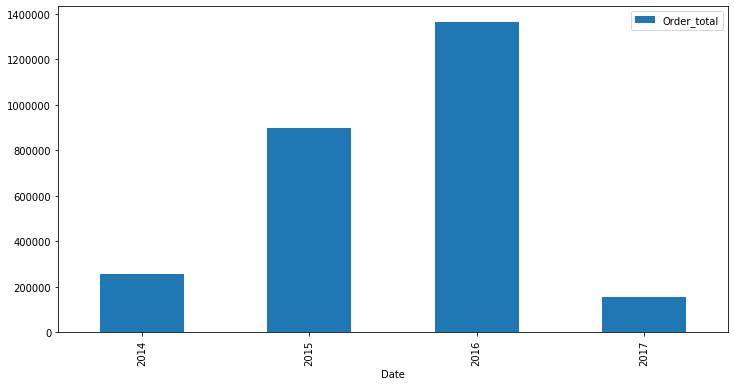

In [70]:
G.plot(kind='bar', x='Date',figsize=(12,6))

## From the exploratory analysis perfomed on the dataset, one is confident to say that the customers are getting better over time, as the customers increased in purchase value, in quantity, and in amount of revenue generated. However, the data for the year 2017 is incomplete, hence, it is not feasible to determine the accurate performance for the year. Although, the values from the first two months of the year indicates a possible positive result.